The two previous notebooks looked at over all p values and alpha diversity for a single category. Now, we'll look at beta diversity, which lets us compare community structure.

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sn
import skbio

import americangut.diversity_analysis as div

from americangut.ag_data import AgData
from americangut.ag_data_dictionary import ag_data_dictionary

/Users/jwdebelius/anaconda/envs/americangut/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
from matplotlib import rcParams

% matplotlib inline

# Formats the axes using seabron so they will be white, and have ticks
# on the bottom of the axes.
sn.set_style('ticks', {'axes.facecolor': 'none'})

# Sets up plotting parameters so that the default setting is use to Helvetica
# in plots
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica', 'Arial']
rcParams['text.usetex'] = True

Next, let's select the data set and rarefaction depth we wish to use.

In [3]:
bodysite = 'fecal'
sequence_trim = '100nt'
rarefaction_depth = '10k'

use_subset = True
use_one_sample = True

Let's pick the category to interogate.

In [4]:
group_name = 'ALCOHOL_FREQUENCY'
metric = 'unweighted_unifac'

Now, let's read the files assoicated with the data and load the data dictionary entry for the group.

In [5]:
fecal_data = AgData(bodysite=bodysite, 
                    trim=sequence_trim, 
                    depth=rarefaction_depth, 
                    sub_participants=use_subset, 
                    one_sample=use_one_sample)

group = ag_data_dictionary[group_name]

We're going to start by cleaning up the data. So, let's remove any samples that might be outliers (in rounds 1-21, there is a sample with alpha diveristy seven standard deivations above the mean and 4 standard deviations about the next highest sample).

We'll also clean up the mapping column as needed, to make analsyis easier.

In [ ]:
fecal_data.map_.groupby(group_name).count().max(1)

In [ ]:
fecal_data.map_.groupby(group_name).count().max(1)

In [6]:
fecal_data.drop_alpha_outliers()
# fecal_data.clean_up_column(group)

Now that we have the data loaded, let's use a post-hoc test to evaluate comparisons between groups. For now, we're going to use the QIIME script, [`make_distance_boxplots.py`](http://qiime.org/scripts/make_distance_boxplots.html).

In [ ]:
save_dir = 'beta_diversity/%(bodysite)s/%(participant_set)s/%(samples_per_participants)s' % fecal_data.data_set
!mkdir -p $save_dir

In [7]:
save_dir = '/Users/jwdebelius/Desktop/'

In [ ]:
!make_distance_boxplots -o $save_dir -m $fecal_data.map_fp -d $fecal_data.unweighted_fp -f $fecal_data.name

In [8]:
distance_summary = pd.read_csv(os.path.join(save_dir, '%s_Stats.txt') % group.name,
                               sep='\t',
                               skiprows=7)

In [ ]:
distance_summary.columns

In [ ]:
def remap_split(x):
    if isinstance(x, str) and '(' in x:
        return x.split('(')[1].replace(')', '').capitalize()
    else:
        return x

In [ ]:
s = 'Never vs. Occasionally (1-2 times/week)'
# ss = 
f_ = lambda x: ' vs. '.join([remap_split(s) for s in x.split(' vs. ')]).replace('  ', ' ')

In [ ]:
f_(s)

In [ ]:
ss = 'Never vs. Daily'
f_(ss)

In [ ]:
s = 'Never vs. Daily'.split(' vs. ')
' vs. '.join([remap_split(x) for x in s])

In [ ]:
distance_summary['Group 1'] = distance_summary['Group 1'].apply(f_)
distance_summary['Group 2'] = distance_summary['Group 2'].apply(f_)

We can use the generated data to make distance plots, 

In [ ]:
set(distance_summary['Group 2'])

In [ ]:
'Never vs. A few times/month' in set(distance_summary['Group 1'])

In [ ]:
'Never vs. A few times/month' in set(distance_summary['Group 2'])

In [ ]:
'Never  vs. A few times/month'
'Never vs. A few times/month'

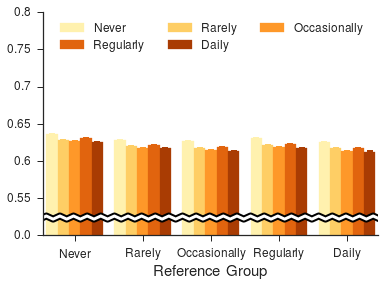

In [30]:
# Loads the post-hoc table for category
post_hoc_ubd = pd.read_csv(os.path.join(save_dir, '%s_Stats.txt') % group.name,
                           sep='\t',
                           skiprows=7)
# Plots the unweighted UniFrac
beta_ax = div.beta_diversity_bars(beta['unweighted_unifrac'],
                                  map_, group.name, 
                                  order=group.order, 
                                  num_iter=999,
                                  colormap='YlOrBr',
#                                   p_table=post_hoc_ubd,
#                                   p_tab_col=,
                                  ylim=[0.5, 0.8],
#                                   colormap=bc_map,
#                                   ylabel=ubd_ylabel,
#                                   title=b_title
                                 )


In [31]:
from americangut.diversity_analysis import add_comparison_bars

In [32]:
sn.barplot(beta['unweighted_unifrac'], map_, group=group.name,
          order=order.name)

AttributeError: 'list' object has no attribute 'name'

In [37]:
from americangut.diversity_analysis import get_distance_vectors

In [38]:
map_, otu, beta = fecal_data.return_dataset(group)

order = group.order

within, between = get_distance_vectors(beta['unweighted_unifrac'], map_, group.name, group.order)

beta.keys()

['weighted_unifrac', 'unweighted_unifrac']

In [39]:
with_ = [] 
for g, v in within.iteritems():
    with_.append(np.vstack((np.array([g] * v.shape[0]), 
                            np.array([g] * v.shape[0]), 
                            v)).transpose())
for g, v in between.iteritems():
    with_.append(np.vstack((np.array([g[0]] * v.shape[0]),
                            np.array([g[1]] * v.shape[0]),
                            v
                            )).transpose())
    with_.append(np.vstack((np.array([g[1]] * v.shape[0]),
                            np.array([g[0]] * v.shape[0]),
                            v
                            )).transpose())
stacked = pd.DataFrame(np.vstack(with_),
                       columns = ['group1', 'group2', 'distance'])
stacked['distance'] = stacked['distance'].astype(float)

(0.5, 0.7)

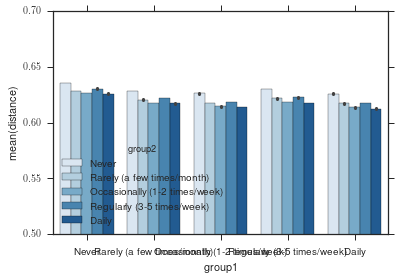

In [40]:
ax = plt.axes()
sn.barplot(x='group1', y='distance', hue='group2', data=stacked,
           estimator=np.mean, n_boot=5, 
          order=group.order, hue_order=group.order,  palette="Blues",
          )
ax.set_ylim([0.5, 0.7])

sn.despine(ax=ax, )

In [ ]:
p = ax.patches[0]

In [ ]:
p.get_bbox()

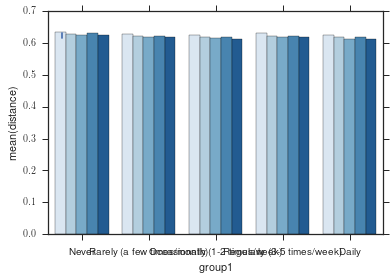

In [41]:
# ax = plt.axes()
means = np.array([w_[:, 2].astype(float).mean() for w_ in with_])
stdv = np.array([w_[:, 2].astype(float).std() / w_.shape[1] for w_ in with_])

ax = plt.axes()

sn.barplot(x='group1', y='distance', hue='group2', data=stacked,
           estimator=np.mean, n_boot=5, ci=None,
           order=group.order, hue_order=group.order,  palette="Blues",
          )
ax.legend_.set_visible(False)

In [45]:
p = ax.patches[0]

In [49]:
print p.get_xy()
p.get_width()

(-0.4, 0.0)


0.16

In [44]:
len(ax.patches)

25

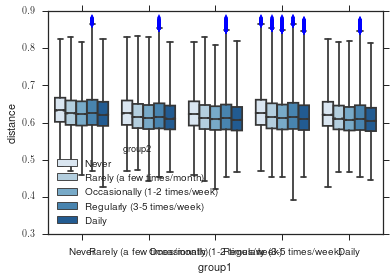

In [51]:
ax = plt.axes()
sn.boxplot(x='group1', y='distance', hue='group2', data=stacked,
#            estimator=np.mean, n_boot=5,
          order=group.order, hue_order=group.order,  palette="Blues",
          whis=3, notch=True)
# ax.set_ylim([0.5, 0.7])

In [ ]:
bar_counter = 0
width = 0.4
for id1, ref_group in enumerate(group.order):
        # Determines the offset
        offset = (id1 * len(group.order) + bar_counter)*width
        # Determines the position of the reference group
        ref_loc = order_count[group.order == ref_group]

        # Adds the distance vector to the means
        dist_bar = np.zeros((len(order)))
        dist_std = np.zeros((len(order)))

        dist_bar[ref_loc] = within[ref_group].mean()
        dist_std[ref_loc] = within[ref_group].std()

        # Sets up the pvalues
        if p_table is None:
            p_values = p_table
        else:
            p_values = np.array([])
            sub_p = pd.concat([p_table.loc[p_table['Group 1'] == '%s vs. %s'
                                           % (ref_group, ref_group)],
                               p_table.loc[p_table['Group 2'] == '%s vs. %s'
                                           % (ref_group, ref_group)]])
            sub_p_lookup = {k: set(sub_p[k].values) for k in
                            ('Group 1', 'Group 2')}

        for id2, group in enumerate(group.order):
            if group == ref_group:
                continue
            # Gets the distance vector
            try:
                dist_bar[id2] = between[(ref_group, group)].mean()
                dist_std[id2] = between[(ref_group, group)].std()
            except:
                dist_bar[id2] = between[(group, ref_group)].mean()
                dist_std[id2] = between[(group, ref_group)].std()
            if p_values is not None:
                p_value = _get_p_value(sub_p, sub_p_lookup, ref_group, group,
                                       p_tab_col)
                p_values = np.hstack((p_values,
                                      _correct_p_value(ref_less, p_value,
                                                       dist_bar[ref_loc],
                                                       dist_bar[id2])))

        dist_bar = np.array(dist_bar)
        dist_std = np.array(dist_std)

In [ ]:
between

In [ ]:
within